In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [66]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [67]:
df_copy=df.copy()
df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [68]:
df_copy['CryoSleep']=df_copy['CryoSleep'].apply(lambda x:1 if x else 0)
df_copy['VIP']=df_copy['VIP'].apply(lambda x:1 if x else 0)
df_copy['Transported']=df_copy['Transported'].apply(lambda x:1 if x else 0)

In [69]:
df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


<Axes: >

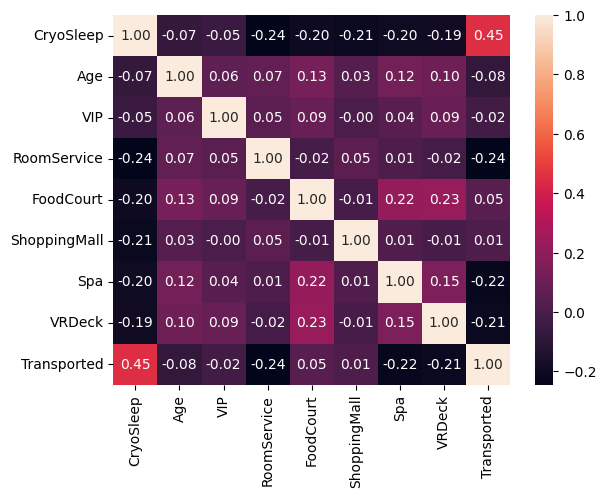

In [70]:
corr=df_copy.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt="0.2f")

In [71]:
df.shape

(8693, 14)

In [72]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [73]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [74]:
df['Deck']=df['Cabin'].str.split('/',expand=True)[0]
df['CabinNum']=df['Cabin'].str.split('/',expand=True)[1]
df['CabinSide']=df['Cabin'].str.split('/',expand=True)[2]
test['Deck']=test['Cabin'].str.split('/',expand=True)[0]
test['CabinNum']=test['Cabin'].str.split('/',expand=True)[1]
test['CabinSide']=test['Cabin'].str.split('/',expand=True)[2]

In [75]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [76]:
print(df['Deck'].value_counts())
print(df['CabinNum'].value_counts())
print(df['CabinSide'].value_counts())

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
CabinNum
82      28
86      22
19      22
176     21
56      21
        ..
1839     1
1848     1
1847     1
1749     1
1782     1
Name: count, Length: 1817, dtype: int64
CabinSide
S    4288
P    4206
Name: count, dtype: int64


In [77]:
df_copy=df.copy()

In [78]:
df_copy['CabinSide'] = df_copy['CabinSide'].apply(lambda x: 1 if x == 'S' else 0)

<Axes: >

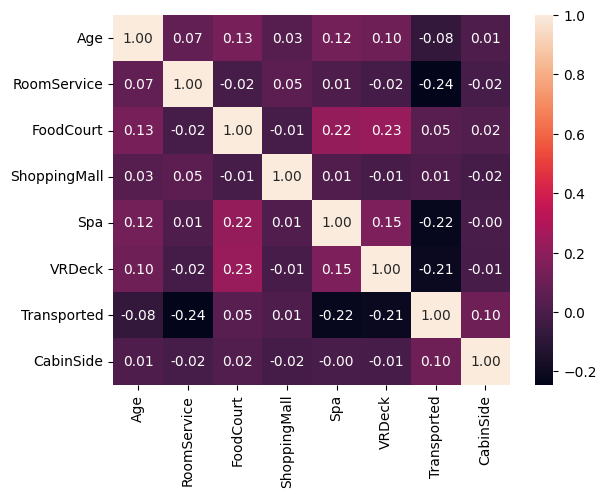

In [79]:
corr=df_copy.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt="0.2f")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  CabinNum      8494 non-null   object 
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [81]:
df['CabinNum']=df['CabinNum'].astype('Int64')
test['CabinNum']=test['CabinNum'].astype('Int64')

In [82]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(exclude='number').columns
num_cols,cat_cols

(Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'CabinNum'],
       dtype='object'),
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
        'Name', 'Transported', 'Deck', 'CabinSide'],
       dtype='object'))

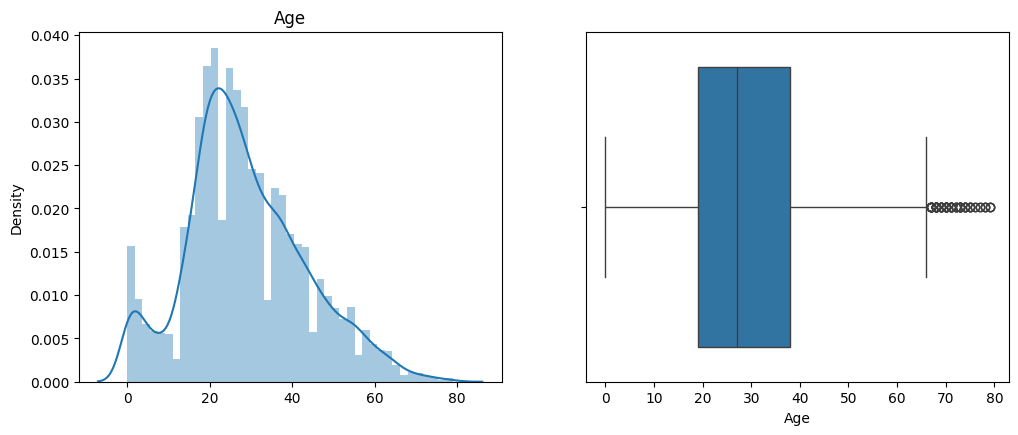

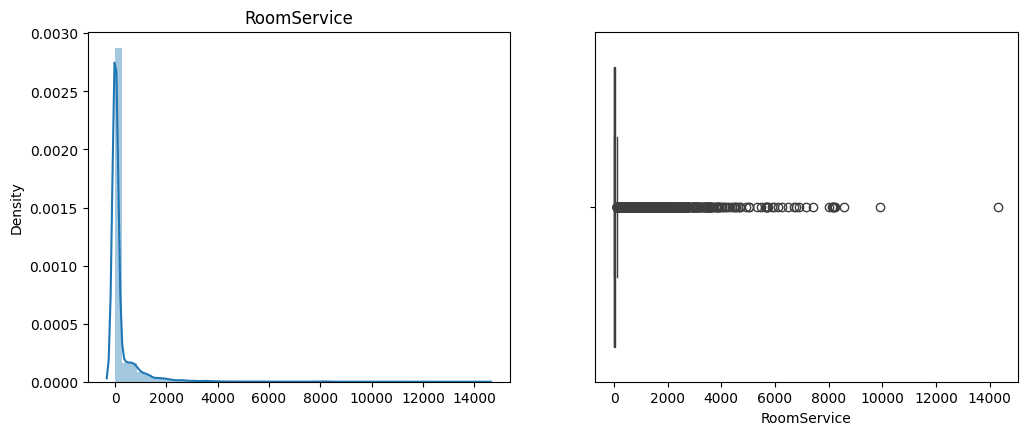

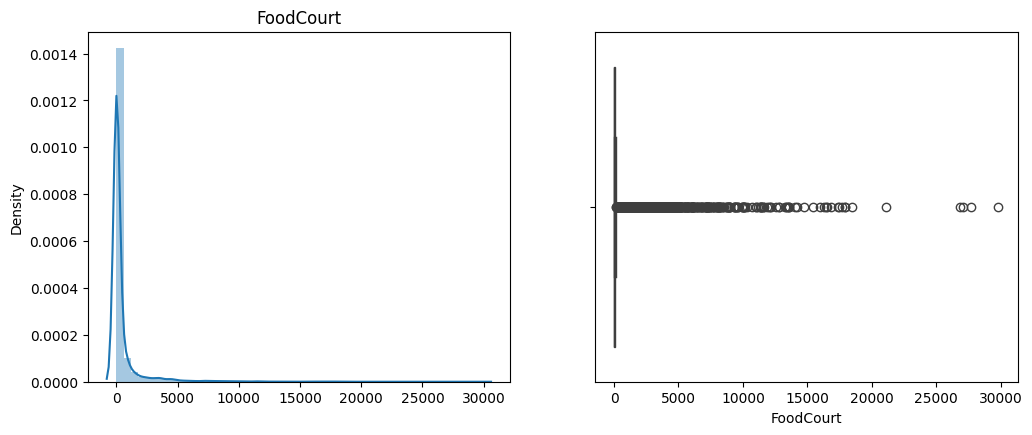

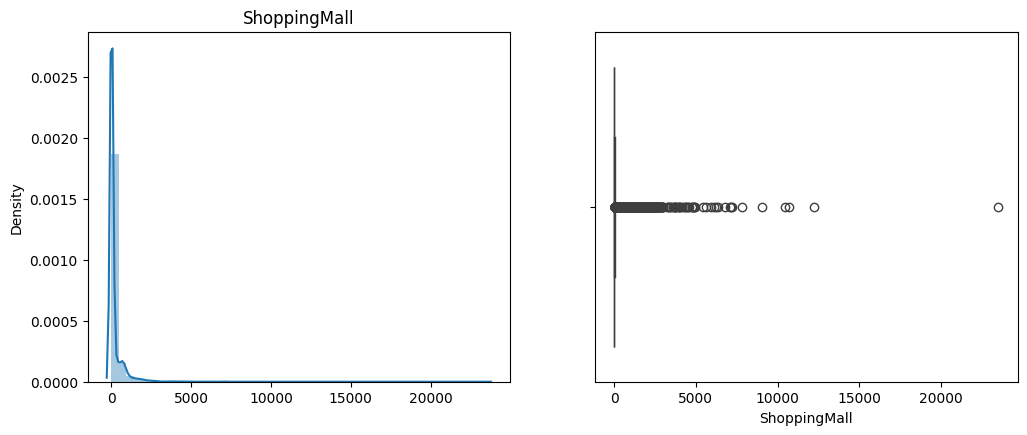

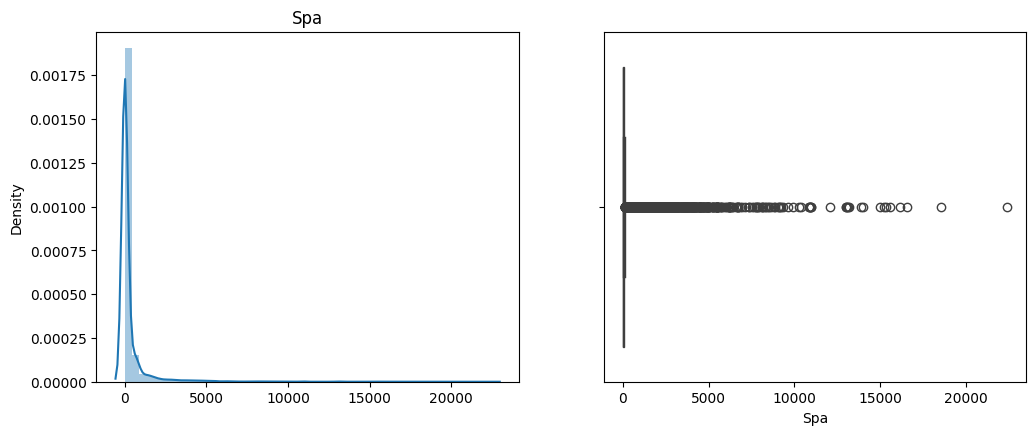

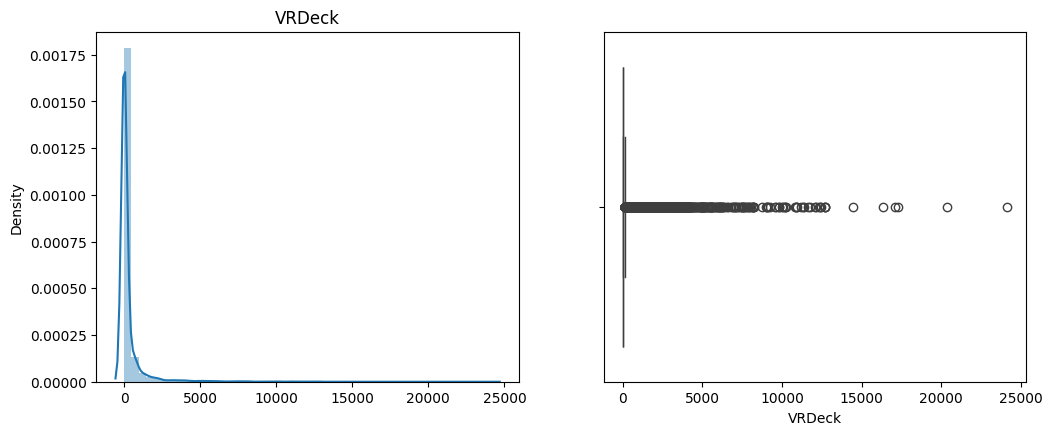

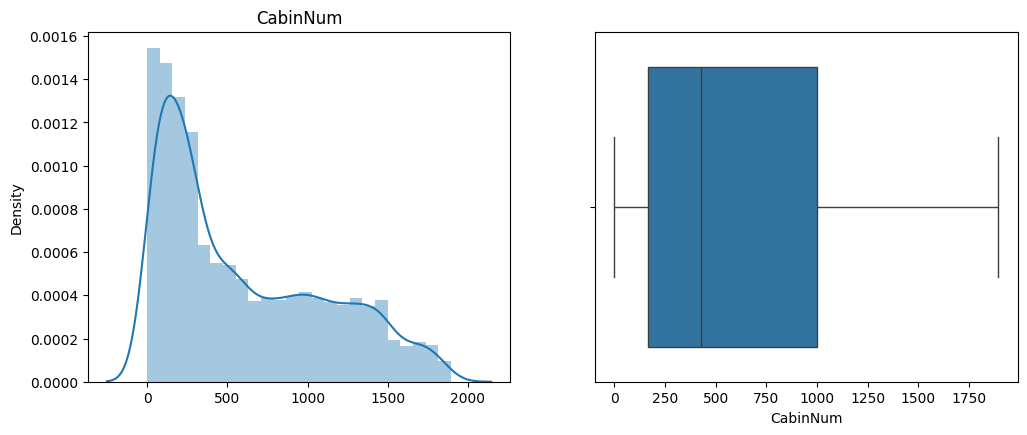

In [83]:
for col in num_cols:
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    sns.distplot(x=df[col])
    plt.title(col)
    plt.subplot(222)
    sns.boxplot(x=df[col])
    plt.show()

In [84]:
num_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNum'],
      dtype='object')

In [85]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
trans_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in trans_cols:
    df[f'Log{col}']=pt.fit_transform(df[[col]])
    test[f'Log{col}']=pt.fit_transform(test[[col]])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,CabinNum,CabinSide,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,0,P,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,F,0,S,1.426200,0.731535,1.236751,1.539799,1.258226
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,A,0,S,1.271105,1.641673,-0.692680,1.672922,1.279716
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,A,0,S,-0.699294,1.590605,1.611079,1.647562,1.485681
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,F,1,S,1.539479,1.269689,1.532958,1.542173,0.203209


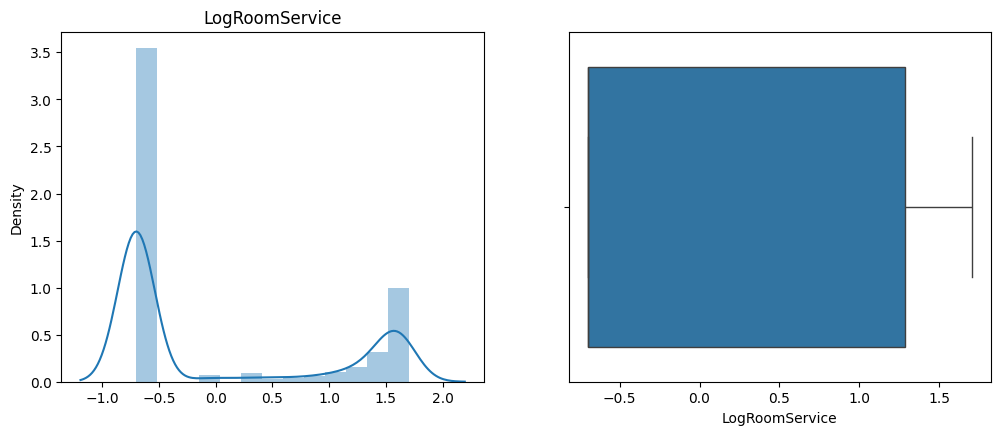

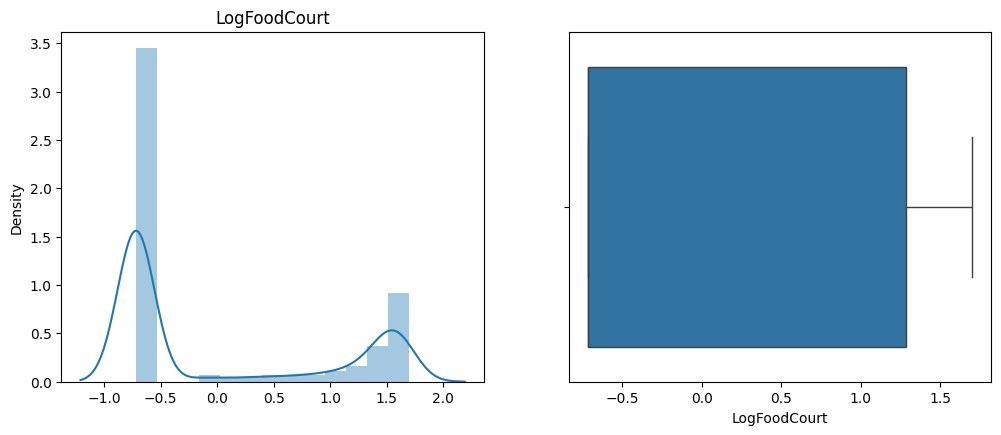

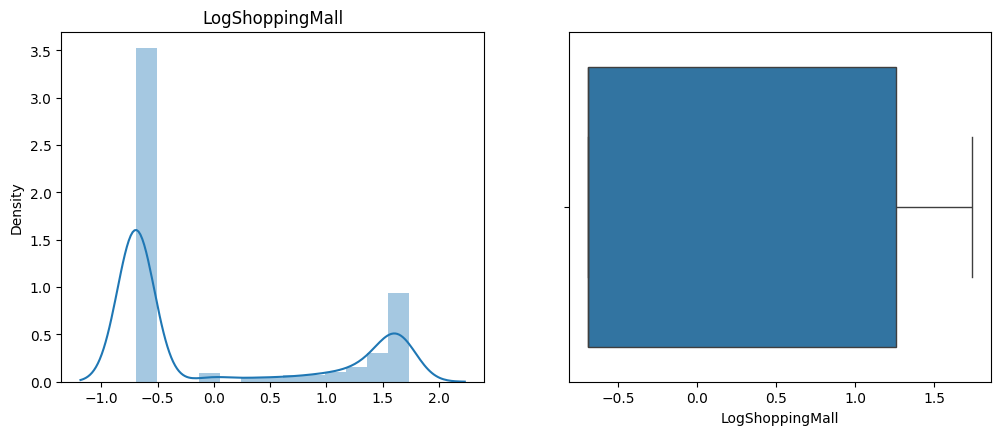

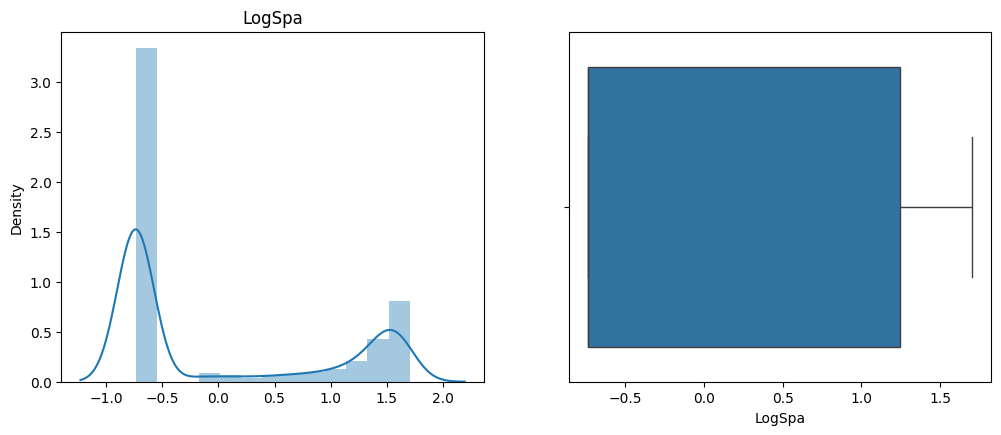

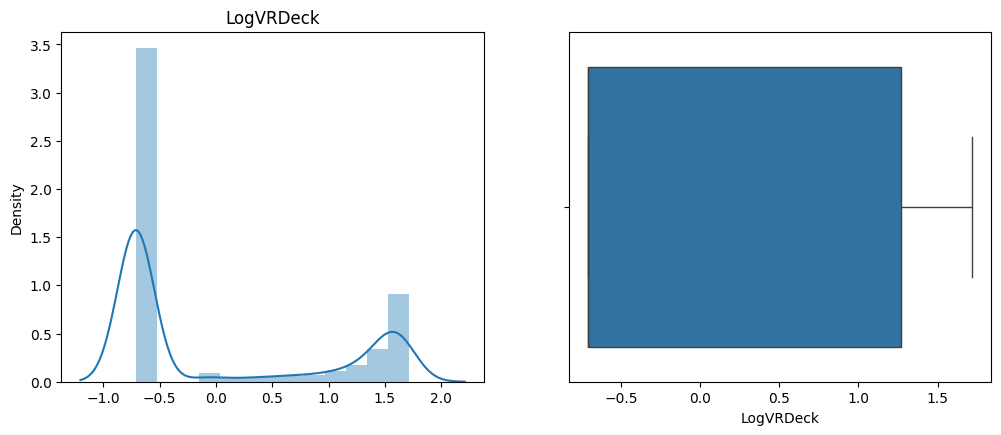

In [86]:
for col in trans_cols:
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    sns.distplot(x=df[f'Log{col}'])
    plt.title(f'Log{col}')
    plt.subplot(222)
    sns.boxplot(x=df[f'Log{col}'])
    plt.show()

In [87]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
df['Age']=np.where(df['Age']>upper,upper,
                   np.where(df['Age']<lower,lower,df['Age']))

In [88]:
print(df['VIP'].value_counts())
print(df['CryoSleep'].value_counts())
print(df['Transported'].value_counts())

VIP
False    8291
True      199
Name: count, dtype: int64
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Transported
True     4378
False    4315
Name: count, dtype: int64


In [89]:
df.drop(columns=['PassengerId','Cabin','Name'],inplace=True)

In [90]:
test.drop(columns=['PassengerId','Cabin','Name'],inplace=True)

In [91]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Transported']=le.fit_transform(df[['Transported']])

In [92]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [93]:
x=df.drop(columns=['Transported'])
y=df.Transported
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,CabinSide,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck
2333,Earth,False,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,NaN,<NA>,NaN,-0.699294,1.223996,-0.692680,1.554095,-0.710182
2589,Earth,False,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,F,575,P,-0.699294,1.586263,1.285746,-0.737298,-0.710182
8302,Europa,True,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,C,329,S,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
8177,Mars,False,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,F,1800,P,NaN,0.132590,1.592563,1.582653,-0.710182
500,Europa,True,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,C,18,P,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182


In [95]:
mean_trf_col=['Age']
onehot_trf_col=['HomePlanet','Destination','Deck']
ord_trf_col=['CryoSleep','VIP','CabinSide']
median_trf_col=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CabinNum', 'LogRoomService', 'LogFoodCourt', 'LogShoppingMall','LogSpa', 'LogVRDeck']

In [96]:
trf1=(
    'mean_trf',Pipeline([
        ('impute',SimpleImputer(strategy='mean')),
        ('scale',StandardScaler())
    ]),mean_trf_col
)
trf2=(
    'median_trf',Pipeline([
        ('impute',SimpleImputer(strategy='median')),
        ('scale',StandardScaler())
    ]),median_trf_col
)
trf3=(
    'ord_trf',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encode',OrdinalEncoder())
    ]),ord_trf_col
)
trf4=(
    'one_trf',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encode',OneHotEncoder(sparse_output=False))
    ]),onehot_trf_col
)

In [97]:
transform=ColumnTransformer(transformers=[trf1,trf2,trf3,trf4],remainder='passthrough')

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb=XGBClassifier(n_jobs=1)
pipe=Pipeline([
    ('transform',transform),
    ('clf',xgb)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.7987349051178838

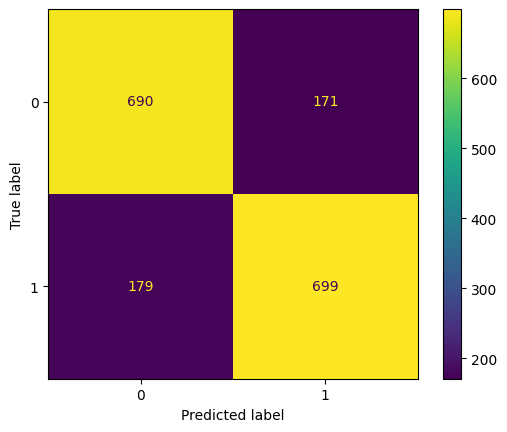

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [101]:
# param_grid = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [3, 5, 7],
#     'clf__learning_rate': [0.01, 0.05, 0.1,0.2],
#     'clf__subsample': [0.6, 0.8, 1.0],
#     'clf__colsample_bytree': [0.6, 0.8, 1.0],
#     'clf__gamma': [0, 1, 5]
# }
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# pipe_xgb_grid=Pipeline([
#     ('transformer',transform),
#     ('clf',xgb)
# ])
# grid_xgb=GridSearchCV(estimator=pipe_xgb_grid, param_grid=param_grid,cv=5, scoring='accuracy', verbose=1, n_jobs=1)
# grid_xgb.fit(x_train,y_train)
# y_pred=grid_xgb.predict(x_test)
# accuracy_score(y_test,y_pred)

In [102]:
# grid_xgb.best_params_

In [103]:
xgb=XGBClassifier(colsample_bytree= 0.8,
 gamma= 1,
 learning_rate= 0.05,
 max_depth= 5,
 n_estimators= 200,
 subsample= 0.6,
 n_jobs=1,random_state=42)
pipe=Pipeline([
    ('transform',transform),
    ('clf',xgb)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.7998849913743531

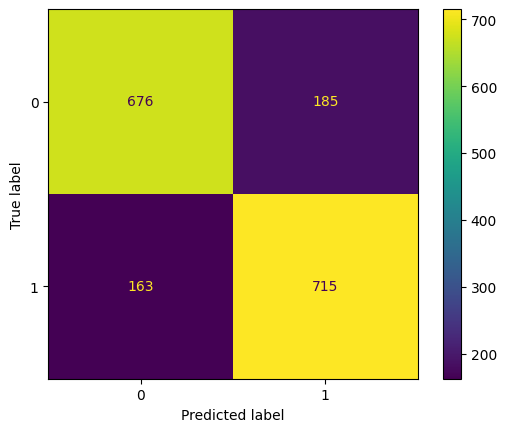

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [105]:
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = pipe.predict(test)
test_preds=le.inverse_transform(test_preds)
submission = y_test_sub.copy()
submission['Transported'] = test_preds
submission.to_csv('final_submission.csv', index=False)
print("Successfull!")

Successfull!
